In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Problem set 1 (2024 version)
## Problem 1
Part a

Pseudocode:

Input: 
 - function: fn
 - min guess: xmin
 - max guess: xmax

Code:
 - Loop:
    - midpoint <- (xmin + xmax) / 2
    - if fn(midpoint) = 0:
        - return **midpoint**
    - elif fn(midpoint) > 0:
        - xmax <- midpoint
    - else:
        - xmin <- midpoint

In [ ]:
def root_bisection(fn, xmin, xmax, tol=1e-14, nits=500):
    '''I don't feel like writing docstrings'''
    # sanitise
    if not callable(fn):
        raise ValueError('fn must be a callable function')
    if fn(xmin) * fn(xmax) >= 0:
        raise ValueError('fn(xmin) and fn(xmax) must have opposite signs')
    if fn(xmin) >= fn(xmax):
        xmin, xmax = xmax, xmin  # swap

    # main loop
    n = 0
    while n < nits:
        midpoint = (xmin + xmax) / 2
        f_mid = fn(midpoint)
        if np.abs(f_mid) < tol:
            break
        elif f_mid > 0:
            xmax = midpoint
        else:
            xmin = midpoint
        n += 1
    else:
        raise ValueError(f'Root not found in {nits} iterations. Current midpoint: {midpoint}.')
    print(f'Root found at {midpoint} in {n} iterations, with residual {f_mid:.3e}.')
    
    

In [54]:
fn = lambda x: x**2 + 5*x - 6
root_bisection(fn, -1.5, 6, 1e-14, 100)

Root found at 1.000000000000001 in 50 iterations, with residual 7.105e-15.


In [ ]:
fn = lambda x: x/(1+np.exp(x)) + 1
root_bisection(fn, -2, 6, 1e-14, 100)

Root found at -1.2784645427610712 in 45 iterations, with residual 2.554e-15.


Part b

In [98]:
def root_newton(fn, fnderiv, x0, tolx=1e-10, tolf=1e-13, nits=100, ret=False):
    # main loop
    n = 0
    while n < nits:
        f = fn(x0)
        if np.abs(f) < tolf:
            break
        df = fnderiv(x0)
        if np.abs(df) < tolx:
            raise ValueError('Derivative too small')
        x0 -= f / df
        n += 1
    else:
        raise ValueError(f'Root not found in {nits} iterations. Current x0: {x0}.')
    if ret:
        return x0
    else:
        print(f'Root found at {x0} in {n} iterations, with residual {f:.3e}.')

In [70]:
fn = lambda x: x**2 + 5*x - 6
fnderiv = lambda x: 2*x + 5
root_newton(fn, fnderiv, 1e15, 1e-14, 1e-14, 100)

Root found at 1.0 in 53 iterations, with residual 0.000e+00.


## Question 2

Part a,b,d

In [84]:
def forward_euler(dydt, y0, dt, tn):
    y_list = [y0]
    for t in np.arange(0, tn, dt):
        y = y_list[-1]
        y += dydt(y, t) * dt
        y_list.append(y)
    return y_list

In [ ]:
def backward_euler(dydt, y0, dt, tn, ytol=1e-2):
    y_list = [y0]
    for t in np.arange(0, tn, dt):
        # This is the secant root finding method
        fn = lambda y: y - dydt(y, t) * dt - y_list[-1]
        # we can analytically differentiate here instead of a fd
        fn_deriv = lambda y: (fn(y+ytol) - fn(y)) / ytol
        y = root_newton(fn, fn_deriv, y_list[-1], ret=True)
        y_list.append(y)
    return y_list

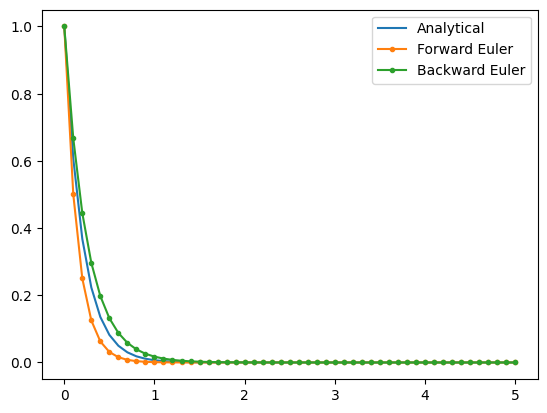

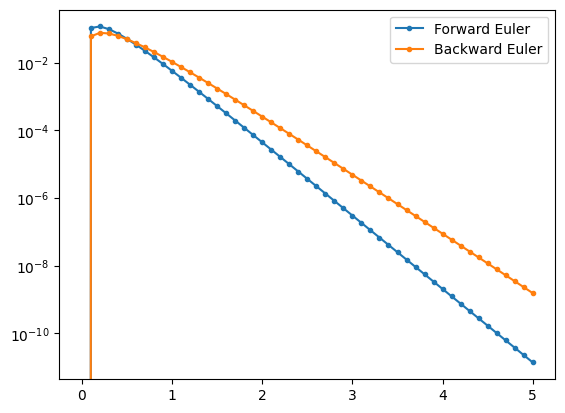

In [166]:
w = 5
ft = lambda t: 0
fn = lambda y, t: -w * y + ft(t)

y0 = 1
dt = .1
tn = 5
t = np.arange(0, tn+dt, dt)
sol = np.exp(-w*t)

def plot_euler(sol):
    fe = forward_euler(fn, y0, dt, tn)
    be = backward_euler(fn, y0, dt, tn)

    plt.plot(t, sol, label='Analytical')
    plt.plot(t, fe, '.-', label='Forward Euler')
    plt.plot(t, be, '.-', label='Backward Euler')
    plt.legend()
    plt.show()

    plt.plot(t, np.abs(sol-fe), '.-', label='Forward Euler')
    plt.plot(t, np.abs(sol-be), '.-', label='Backward Euler')
    # plt.axhline(0, c='k', ls='--')
    plt.yscale('log')
    plt.legend()
    plt.show()
plot_euler(sol)

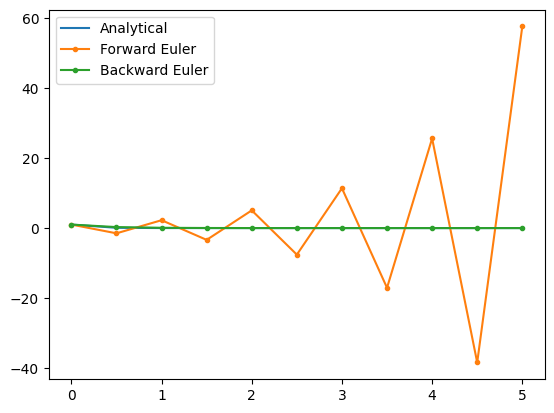

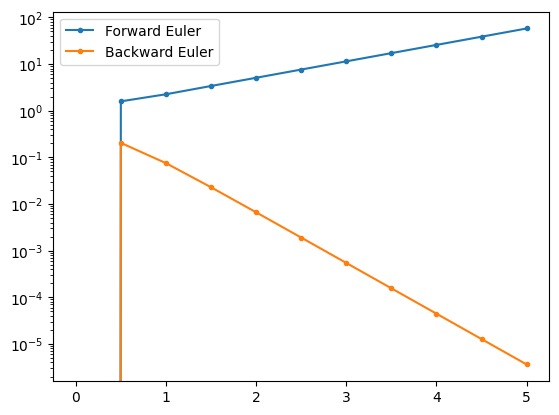

In [167]:
w = 5
ft = lambda t: 0
fn = lambda y, t: -w * y + ft(t)

y0 = 1
dt = .5
tn = 5
t = np.arange(0, tn+dt, dt)
sol = np.exp(-w*t)

plot_euler(sol)

Part f

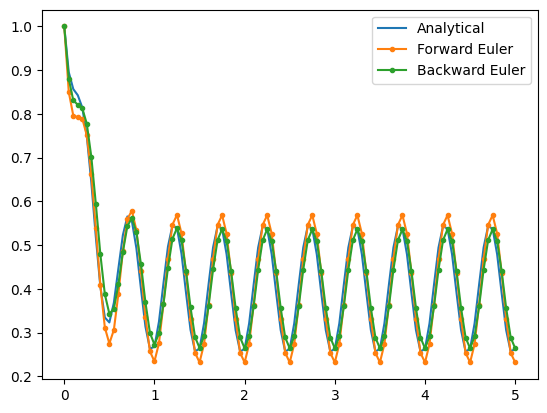

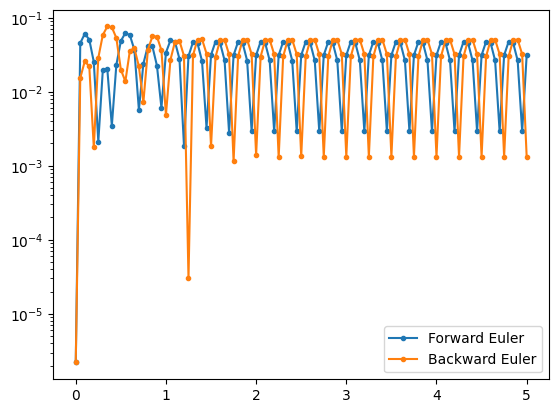

In [ ]:
w = 5
ft = lambda t: 2 + 2 * np.sin(4*np.pi*t)
fn = lambda y, t: -w * y + ft(t)
sol = lambda t: 0.00109341 * 2.71828**(-5* t)* (365.827* 2.71828**(5 *t) + 50*2.71828**(5* t) *np.sin(12.5664* t) - 125.664* 2.71828**(5* t) *np.cos(12.5664 *t) + 674.405)  # WA

y0 = 1
dt = .05
tn = 5
t = np.arange(0, tn+dt, dt)
plot_euler(sol(t))

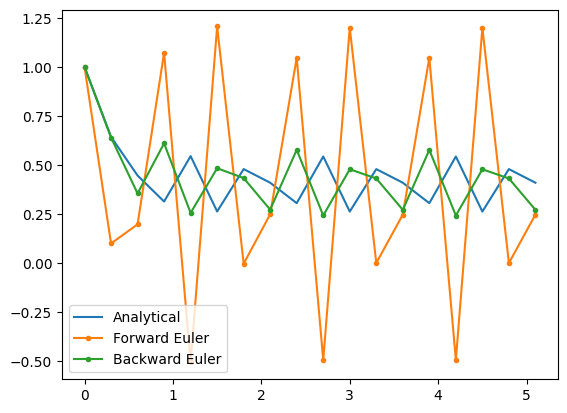

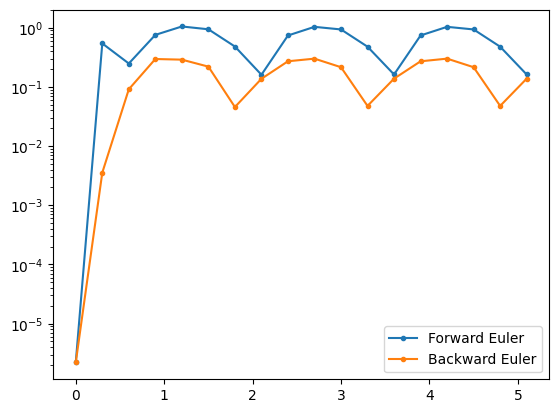

In [ ]:
y0 = 1
dt = .3  # Too big for forcing period
tn = 5
t = np.arange(0, tn+dt, dt)
plot_euler(sol(t))

## Q3
